In [27]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import Boosting.common_boosting as common_boosting
import TrainingCurves

import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

In [28]:
GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_BOOSTING"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "Boosting"
DATASET = "Noisy Non-Linear"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
dt_title = "{} Base Estimator From Decision Tree Analysis Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

ylim=(0.45, 1.05)

In [29]:
# Load Data
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [30]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(), X_train, y_train, "accuracy")

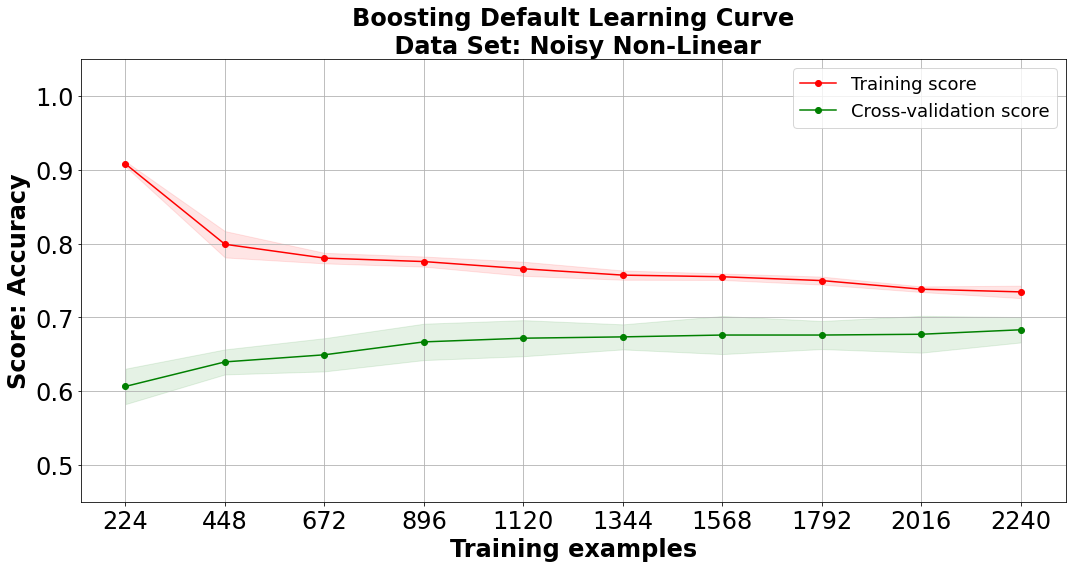

In [31]:
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)

In [6]:
DT_final_params = {'ccp_alpha': 0.0015, 'max_depth': 4, 'criterion': 'gini'}
# Start with DT From DT Analysis for base estimator
dt_train_sizes, dt_train_scores, dt_test_scores, dt_fit_times, dt_score_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(**DT_final_params)), X_train, y_train, "accuracy")

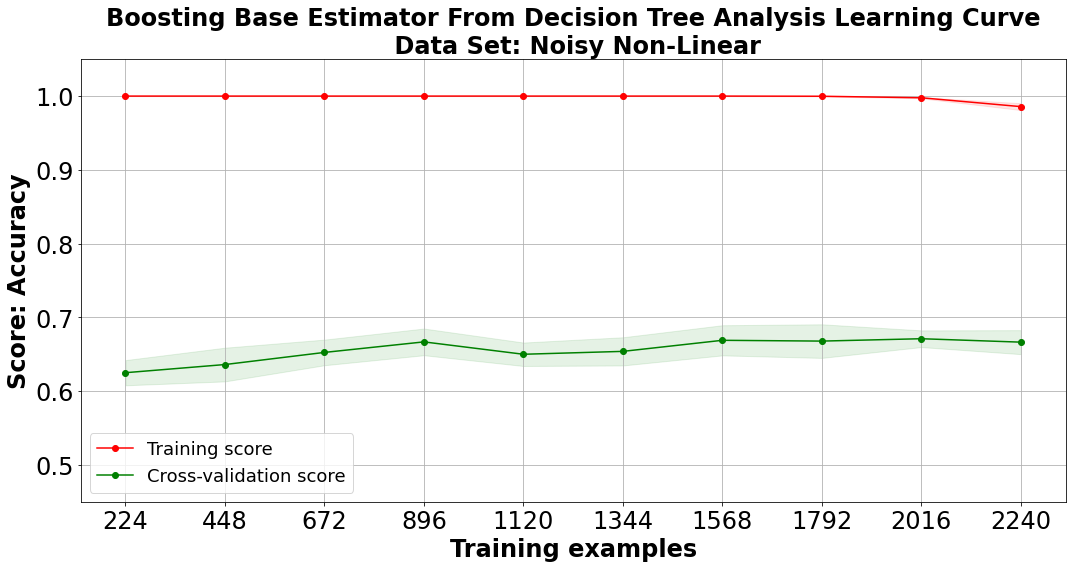

In [7]:
TrainingCurves.plot_learning_curve(dt_train_scores, dt_test_scores, dt_train_sizes, dt_title, ylim=ylim)

In [8]:
n_estimators = [i for i in range(1, 50)]
learning_rate = [i for i in np.arange(0.02, .8, 0.01)]
ccp_alpha = np.arange(0.0, 0.2, 0.001)
max_depth = [i for i in range(1, 20, 1)]

post_pruning_classifiers = []
post_pruning_labels = []
for i in ccp_alpha:
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=3))
    post_pruning_labels.append(i)

max_depth_classifiers = []
max_depth_labels = []
for i in max_depth:
    max_depth_classifiers.append(tree.DecisionTreeClassifier(max_depth=i))
    max_depth_labels.append(i)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    6.2s finished


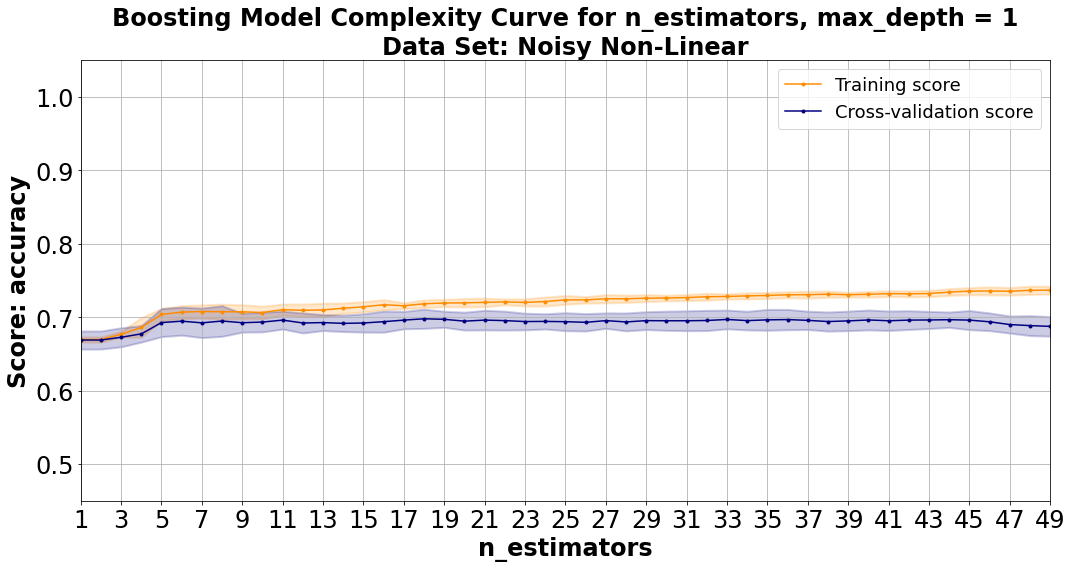

In [9]:
title = "{} Model Complexity Curve for n_estimators, max_depth = 1\nData Set: {}".format(ALGO, DATASET)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "n_estimators", n_estimators, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=-1)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_estimators", n_estimators, title=title, scoring="accuracy", tick_spacing=2, ylim=ylim)

In [10]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "learning_rate", learning_rate, 'accuracy', cv=TrainingCurves.get_cv())


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:   16.3s finished


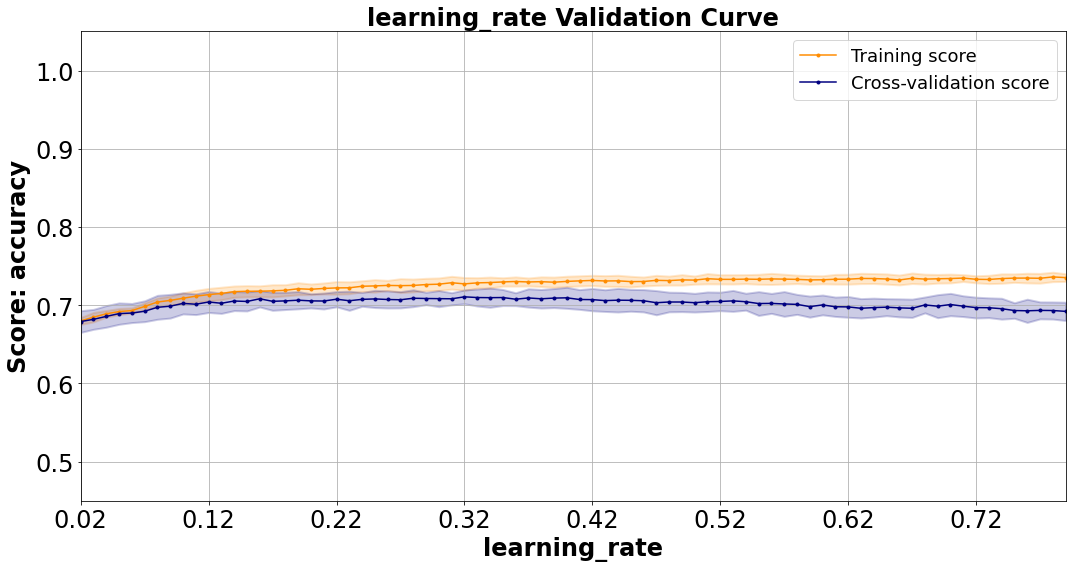

In [11]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate", learning_rate, title="learning_rate Validation Curve", scoring="accuracy", tick_spacing=10, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   15.3s finished


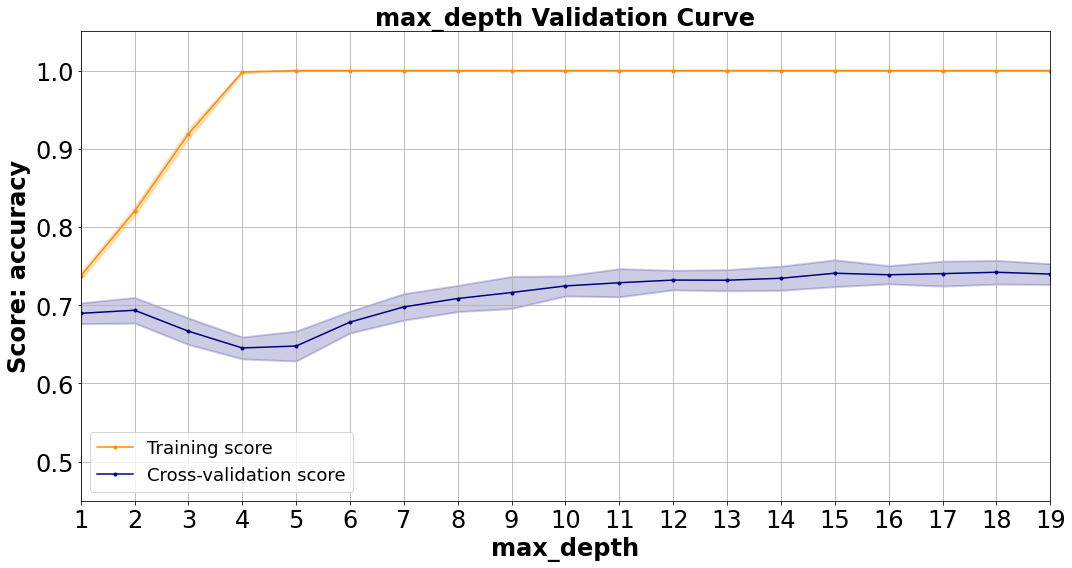

In [12]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "base_estimator", max_depth_classifiers, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth_labels, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=1,ylim=ylim)

In [13]:
post_pruning_classifiers = []
post_pruning_labels = []
max_depth=1
for i in ccp_alpha:
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=max_depth))
    post_pruning_labels.append(i)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "base_estimator", post_pruning_classifiers, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 192 out of 2000 | elapsed:    4.5s remaining:   42.7s
[Parallel(n_jobs=-1)]: Done 393 out of 2000 | elapsed:    9.2s remaining:   37.4s
[Parallel(n_jobs=-1)]: Done 594 out of 2000 | elapsed:   13.8s remaining:   32.6s
[Parallel(n_jobs=-1)]: Done 795 out of 2000 | elapsed:   18.4s remaining:   27.9s
[Parallel(n_jobs=-1)]: Done 996 out of 2000 | elapsed:   23.0s remaining:   23.2s
[Parallel(n_jobs=-1)]: Done 1197 out of 2000 | elapsed:   27.7s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done 1398 out of 2000 | elapsed:   32.3s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done 1599 out of 2000 | elapsed:   37.0s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done 1800 out of 2000 | elapsed:   41.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   46.2s finished


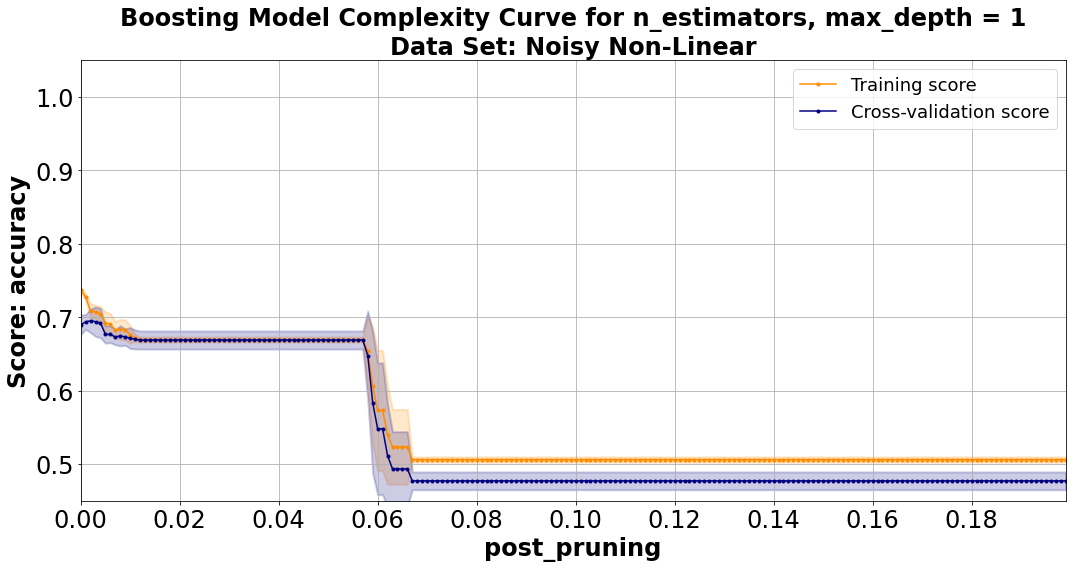

In [14]:
title = "{} Model Complexity Curve for n_estimators, max_depth = {}\nData Set: {}".format(ALGO, max_depth, DATASET)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "post_pruning", post_pruning_labels, title=title.format(max_depth), scoring="accuracy", tick_spacing=20, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 192 out of 2000 | elapsed:    6.7s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 393 out of 2000 | elapsed:   13.3s remaining:   54.3s
[Parallel(n_jobs=-1)]: Done 594 out of 2000 | elapsed:   20.0s remaining:   47.4s
[Parallel(n_jobs=-1)]: Done 795 out of 2000 | elapsed:   26.7s remaining:   40.4s
[Parallel(n_jobs=-1)]: Done 996 out of 2000 | elapsed:   33.4s remaining:   33.7s
[Parallel(n_jobs=-1)]: Done 1197 out of 2000 | elapsed:   40.0s remaining:   26.9s
[Parallel(n_jobs=-1)]: Done 1398 out of 2000 | elapsed:   46.7s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done 1599 out of 2000 | elapsed:   53.4s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done 1800 out of 2000 | elapsed:  1.0min remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.1min finished


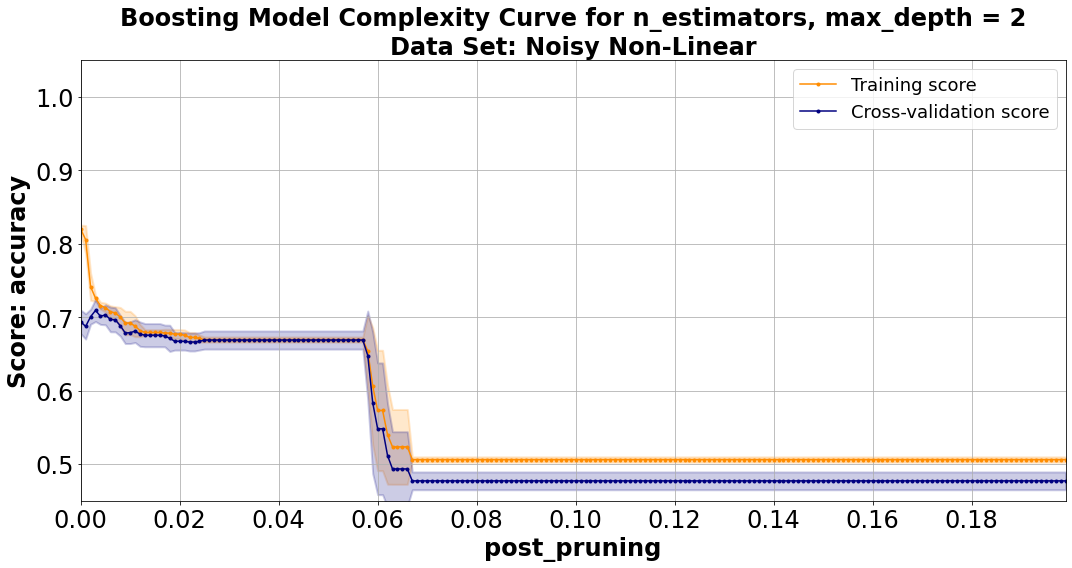

In [15]:
post_pruning_classifiers = []
post_pruning_labels = []
max_depth=2
for i in ccp_alpha:
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=max_depth))
    post_pruning_labels.append(i)

title = "{} Model Complexity Curve for n_estimators, max_depth = {}\nData Set: {}".format(ALGO, max_depth, DATASET)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "base_estimator", post_pruning_classifiers, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "post_pruning", post_pruning_labels, title=title, tick_spacing=20, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 192 out of 2000 | elapsed:    8.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 393 out of 2000 | elapsed:   17.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 594 out of 2000 | elapsed:   25.9s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 795 out of 2000 | elapsed:   34.5s remaining:   52.4s
[Parallel(n_jobs=-1)]: Done 996 out of 2000 | elapsed:   43.2s remaining:   43.5s
[Parallel(n_jobs=-1)]: Done 1197 out of 2000 | elapsed:   51.8s remaining:   34.7s
[Parallel(n_jobs=-1)]: Done 1398 out of 2000 | elapsed:  1.0min remaining:   26.0s
[Parallel(n_jobs=-1)]: Done 1599 out of 2000 | elapsed:  1.2min remaining:   17.3s
[Parallel(n_jobs=-1)]: Done 1800 out of 2000 | elapsed:  1.3min remaining:    8.7s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.4min finished


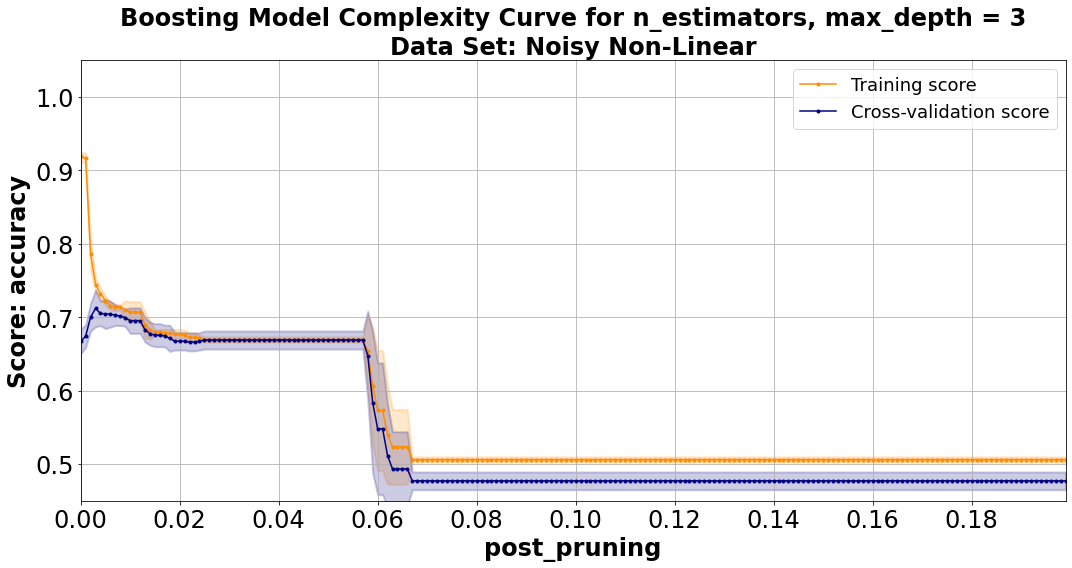

In [16]:
post_pruning_classifiers = []
post_pruning_labels = []
max_depth=3
for i in ccp_alpha:
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=max_depth))
    post_pruning_labels.append(i)

title = "{} Model Complexity Curve for n_estimators, max_depth = {}\nData Set: {}".format(ALGO, max_depth, DATASET)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "base_estimator", post_pruning_classifiers, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "post_pruning", post_pruning_labels, title=title, scoring="accuracy", tick_spacing=20, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 192 out of 2000 | elapsed:   10.3s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done 393 out of 2000 | elapsed:   20.9s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done 594 out of 2000 | elapsed:   31.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 795 out of 2000 | elapsed:   42.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 996 out of 2000 | elapsed:   52.6s remaining:   53.0s
[Parallel(n_jobs=-1)]: Done 1197 out of 2000 | elapsed:  1.1min remaining:   42.3s
[Parallel(n_jobs=-1)]: Done 1398 out of 2000 | elapsed:  1.2min remaining:   31.7s
[Parallel(n_jobs=-1)]: Done 1599 out of 2000 | elapsed:  1.4min remaining:   21.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 2000 | elapsed:  1.6min remaining:   10.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.8min finished


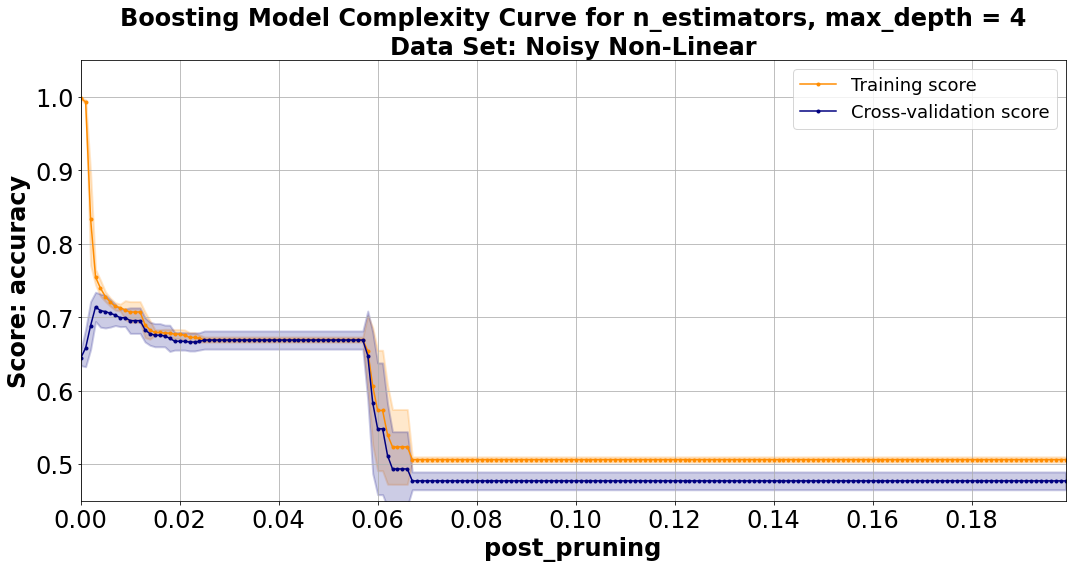

In [17]:
post_pruning_classifiers = []
post_pruning_labels = []
max_depth=4
for i in ccp_alpha:
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=max_depth))
    post_pruning_labels.append(i)

title = "{} Model Complexity Curve for n_estimators, max_depth = {}\nData Set: {}".format(ALGO, max_depth, DATASET)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "base_estimator", post_pruning_classifiers, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "post_pruning", post_pruning_labels, title=title.format(max_depth), scoring="accuracy", tick_spacing=20, ylim=ylim)

In [18]:
n_estimators = [i for i in range(1, 20, 2)]
learning_rate = [i for i in np.arange(0.02, .5, 0.02)]
ccp_alpha = np.arange(0.0, 0.04, 0.001)

post_pruning_classifiers = []
post_pruning_labels = []
for i in ccp_alpha:
    for depth in range(1, 4):
        post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=depth))
    post_pruning_labels.append(i)

post_pruning_classifiers = []
post_pruning_labels = []

for depth in range(1, 6):
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=0.0015, max_depth=depth))

# for i in ccp_alpha:
#     post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i))
    
parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'base_estimator': post_pruning_classifiers}

gs = common_boosting.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


{}
Plot saved as:  Figures/Noisy_Non-Linear_Boosting_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


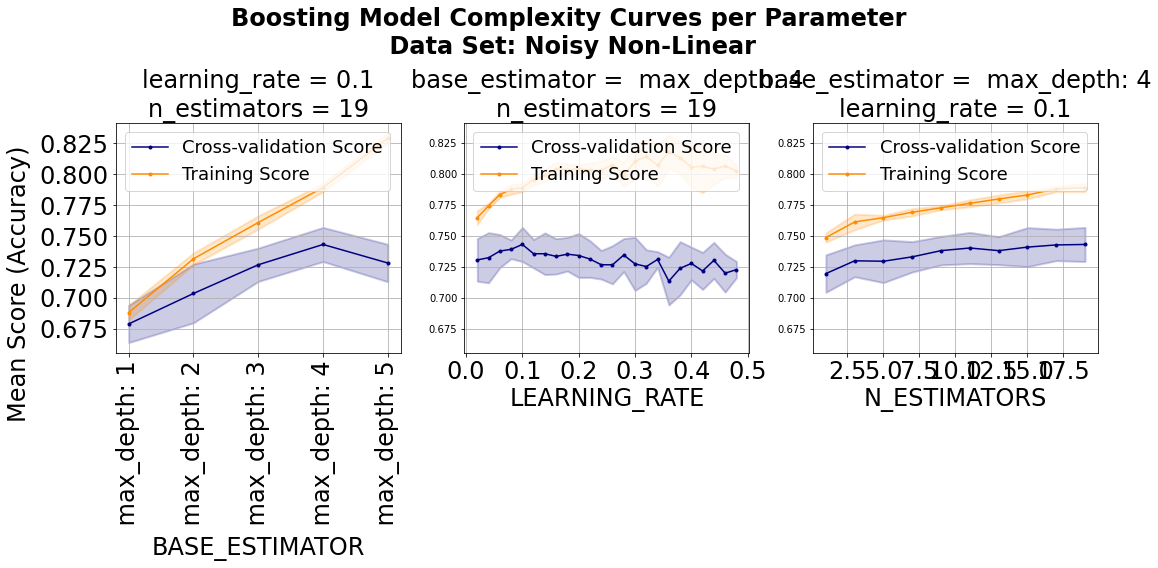

In [19]:
import importlib
importlib.reload(common_grid_search_analysis)
unused_params_values={}
# unused_params_values = {'base_estimator': post_pruning_classifiers[2], 'n_estimators': 3}
print(unused_params_values)
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values, dt_param="max_depth")

Plot saved as:  Figures/Noisy_Non-Linear_Boosting_GS_Times_base_estimator_learning_rate_n_estimators.png


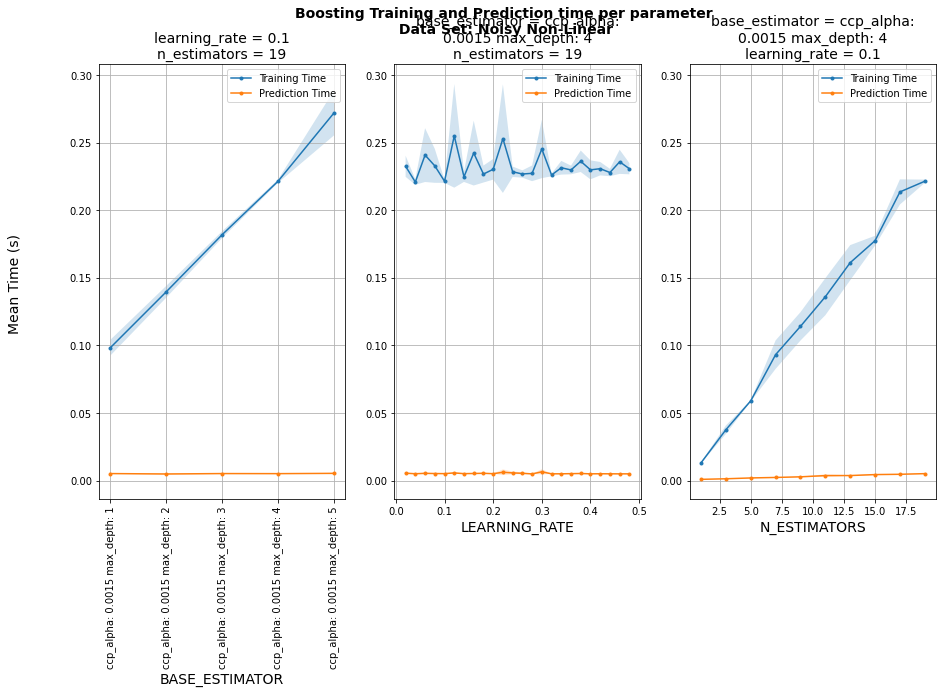

In [20]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Noisy_Non-Linear_Boosting_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


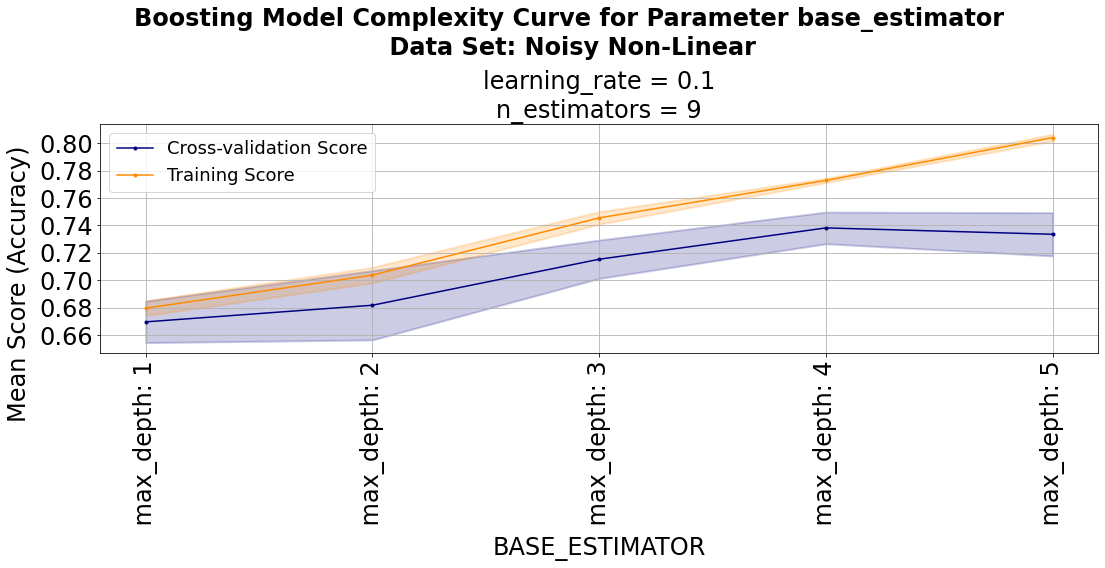

Plot saved as:  Figures/Noisy_Non-Linear_Boosting_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


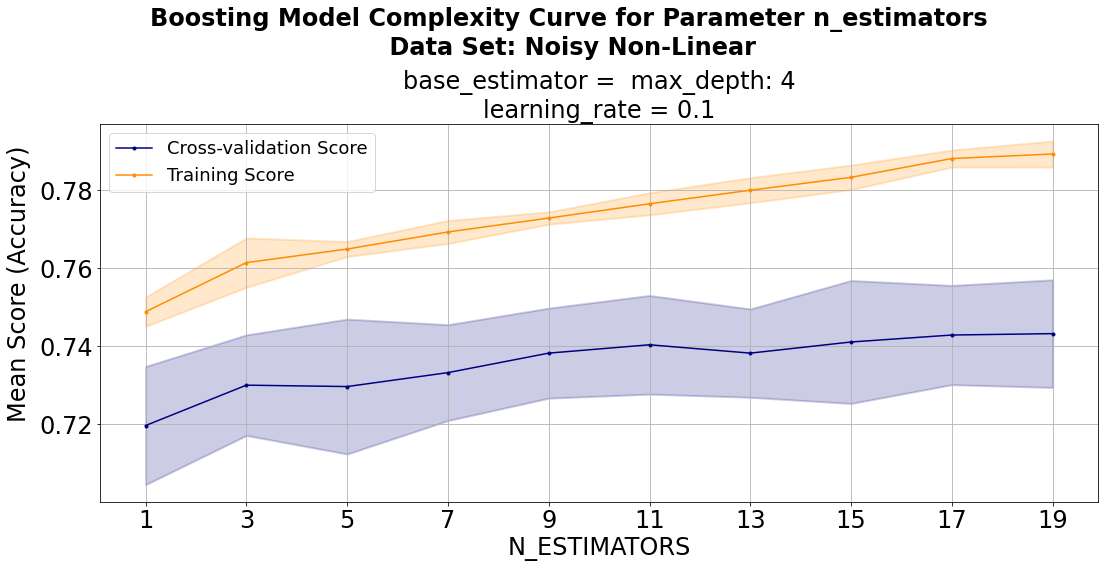

In [21]:
unused_params_values = {'n_estimators':9}
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, "base_estimator", PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values, tick_spacing=1, dt_param='max_depth')
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, "n_estimators", PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values, tick_spacing=1, dt_param='max_depth')

In [22]:
base_estimator=tree.DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3)
params={'base_estimator': base_estimator, 'learning_rate': 0.1, 'n_estimators': 9}

train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(**params), X_train, y_train, "accuracy")

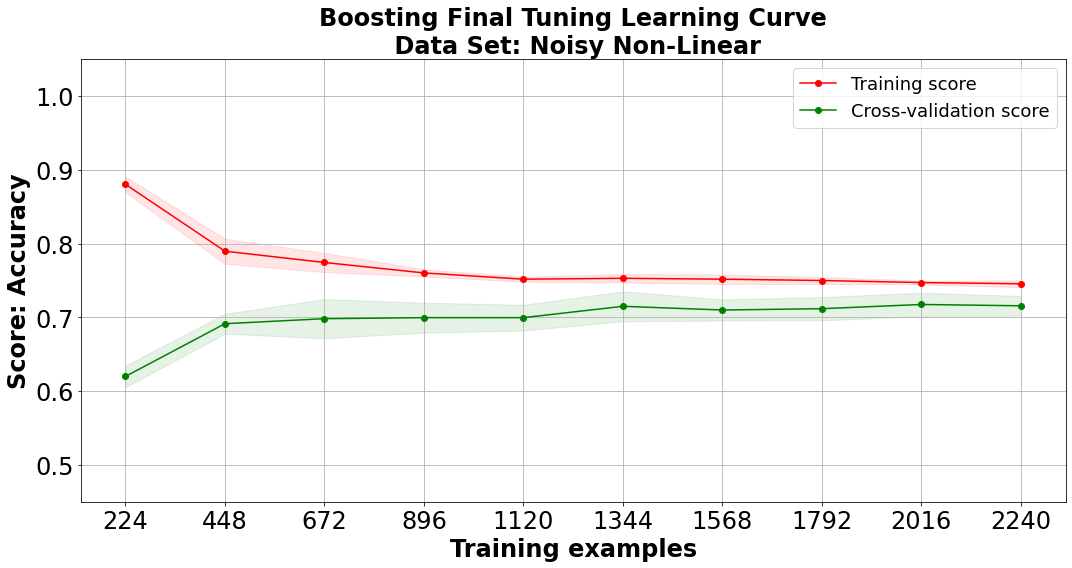

In [23]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)




In [39]:
print("Default Fit Time: {} seconds".format(round(np.mean(default_fit_times, axis=1)[-1], 3)))
print("Default Predict Time {} seconds".format(round(np.mean(default_score_times, axis=1)[-1], 3)))
print()
print("Final Fit Time: {} seconds".format(round(np.mean(fit_times, axis=1)[-1], 3)))
print("Final Predict Time: {} seconds".format(round(np.mean(score_times, axis=1)[-1], 3)))

Default Fit Time: 0.134 seconds
Default Predict Time 0.006 seconds

Final Fit Time: 0.056 seconds
Final Predict Time: 0.002 seconds


In [35]:
clf = AdaBoostClassifier(**params)
clf.fit(X_train, y_train)
print("Train Accuracy: {}%".format(round(clf.score(X_train, y_train)*100, 1)))
print("Test Accuracy: {}%".format(round(clf.score(X_test, y_test)*100, 1)))


Train Accuracy: 74.1%
Test Accuracy: 72.0%


In [36]:
print("Correct Non Noisy Test Accuracy {}%".format(round(clf.score(X_test, y_test_non_noisy)*100, 1)))

Correct Non Noisy Test Accuracy 85.4%
